In [35]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
filepath=r"C:\Users\milam\OneDrive - ALS Bobi\Desktop\diamonds-dataset\diamonds.csv"

data=pd.read_csv(filepath)
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [17]:
label_encoders = {}
for col in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [18]:
column_names = data.columns
X = data.iloc[:, 1:].values.astype(float)
y = data.iloc[:, 0].values.astype(float)
N = X.shape[0]
number_of_features = X.shape[1]
feature_names = column_names[1:]

print(X.shape)
print(y.shape)
print("Карактеристики:", feature_names)
print("Број на карактеристики:", X.shape[1])
print("Број на излезни класи: ", len(np.unique(y)))
print("Број на инстанци:", X.shape[0])

(53940, 10)
(53940,)
Карактеристики: Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
Број на карактеристики: 10
Број на излезни класи:  53940
Број на инстанци: 53940


<Axes: >

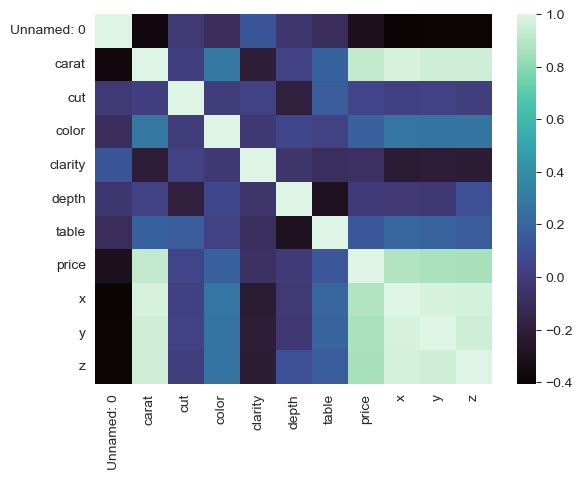

In [32]:
sns.heatmap(data.corr(), cmap='mako')

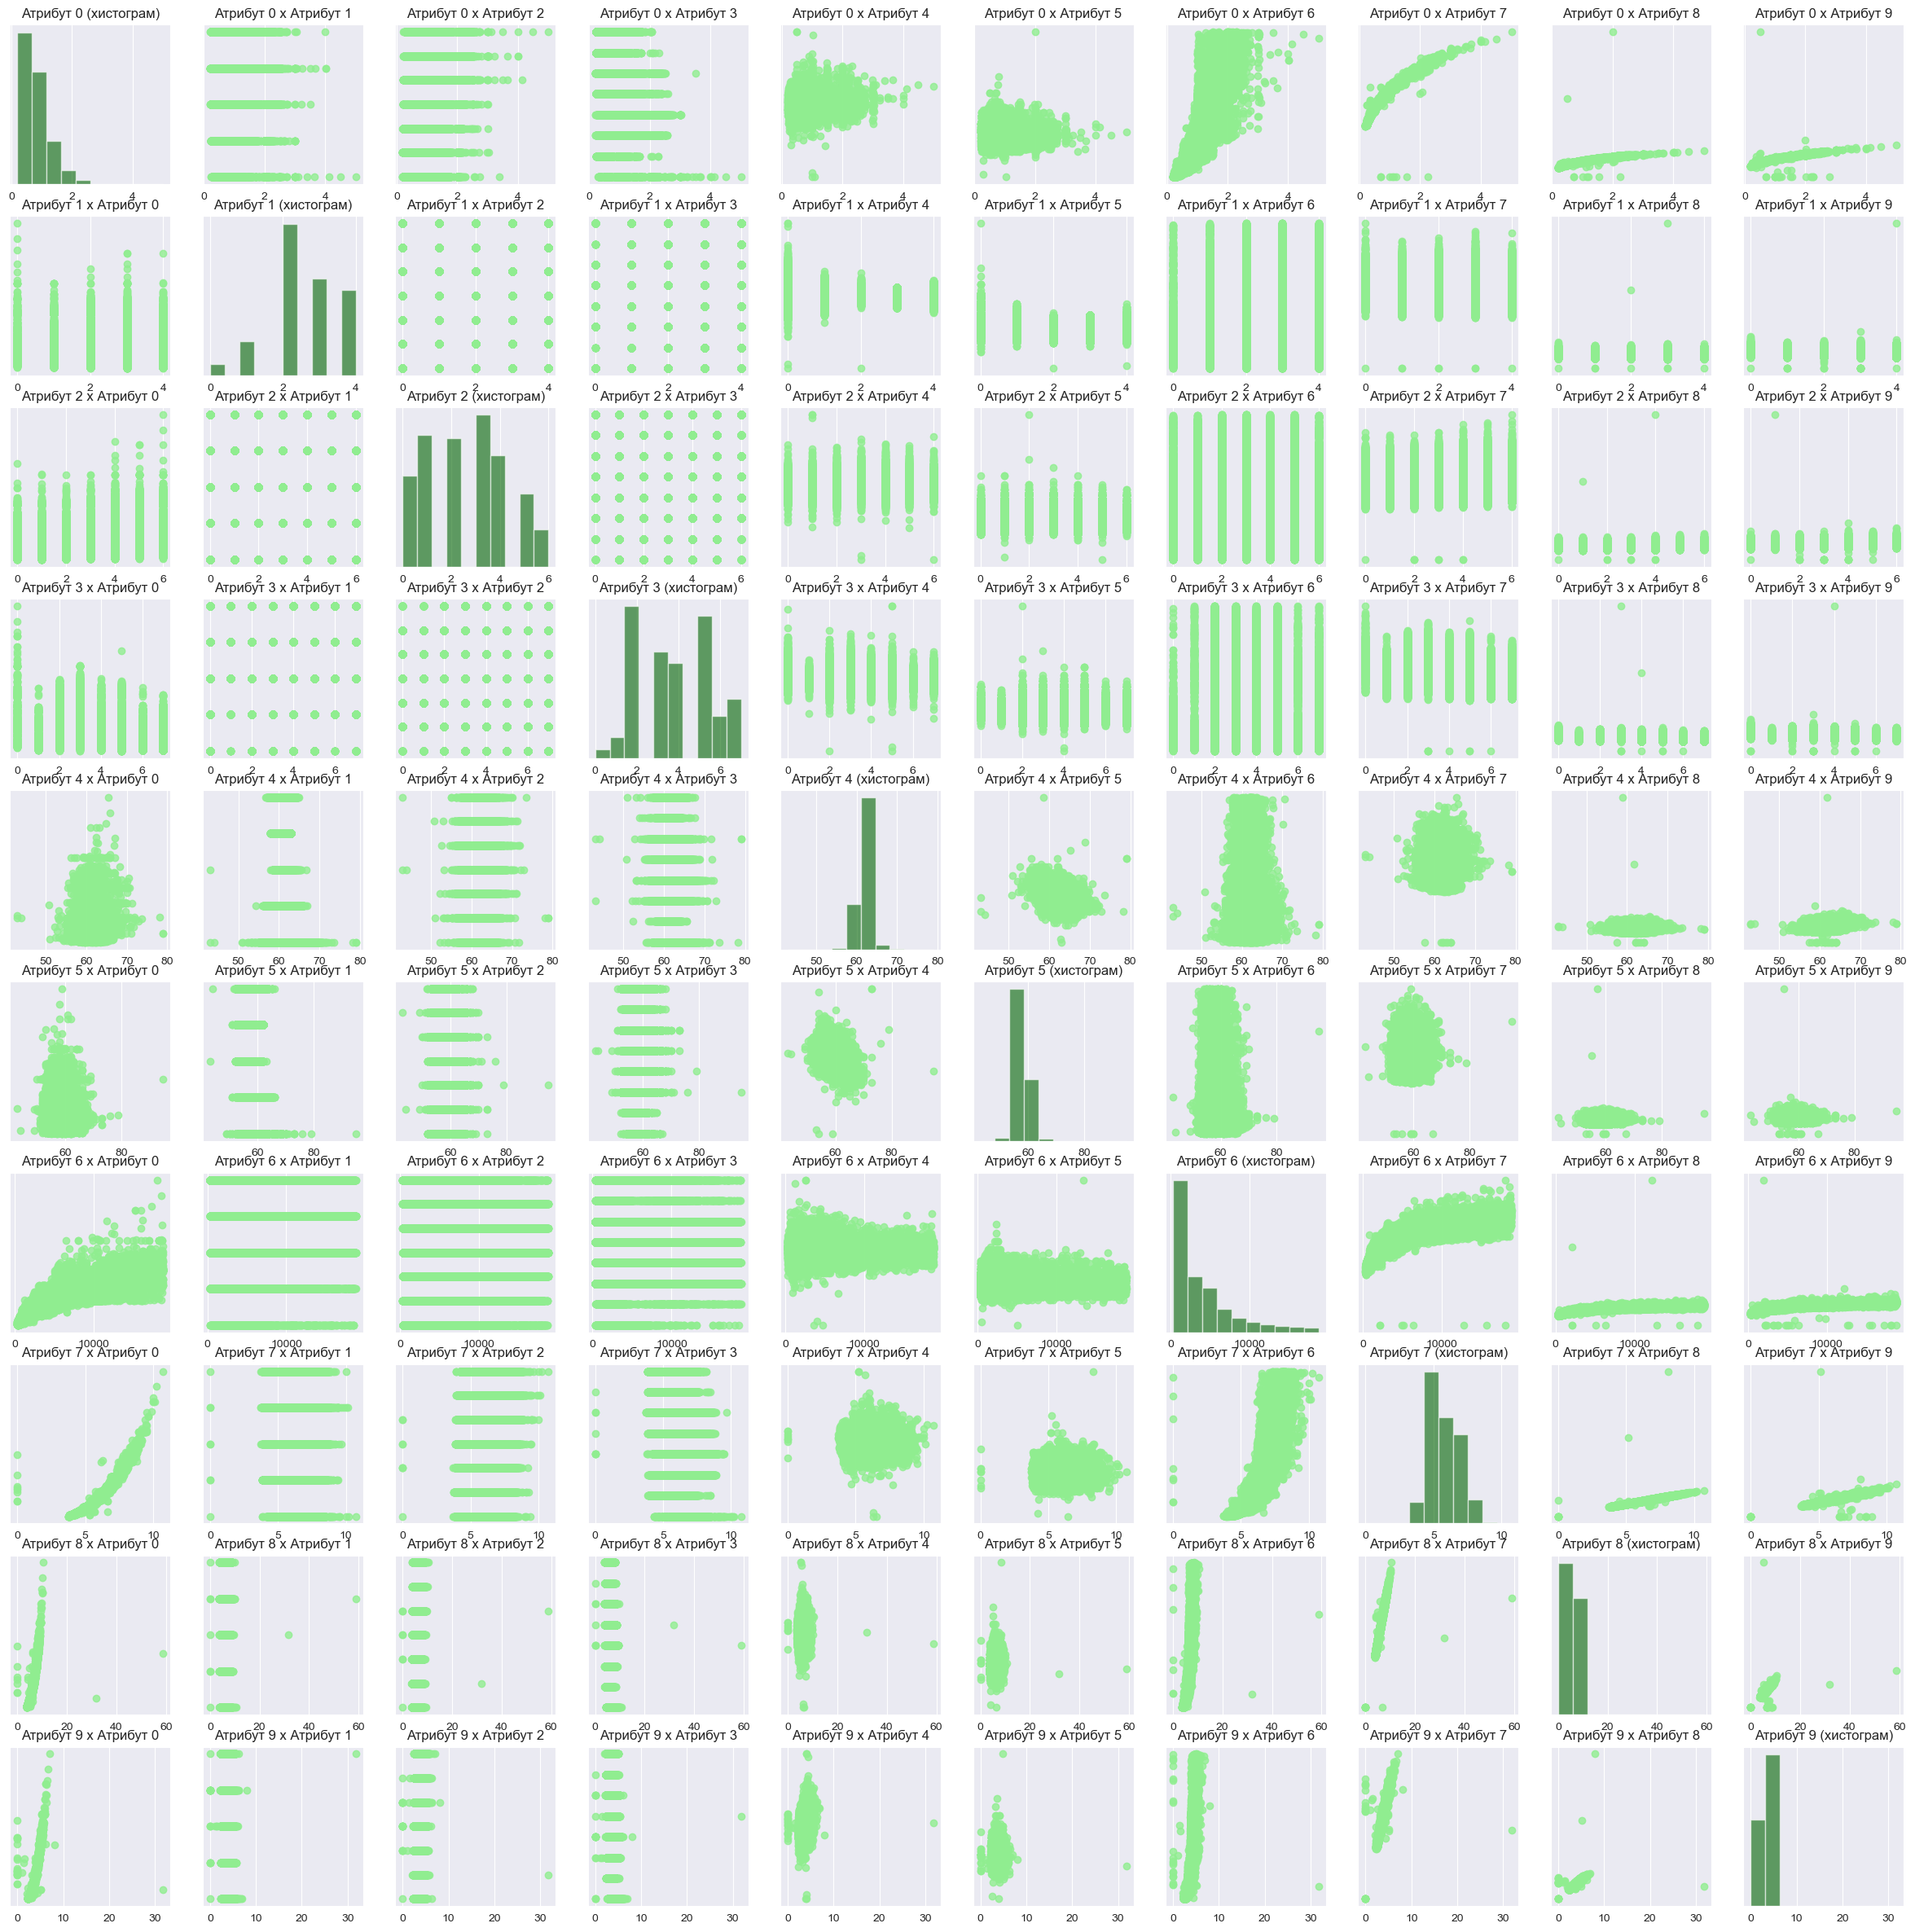

In [20]:
fig = plt.figure(figsize=(30, 30))
fig.subplots(nrows=number_of_features, ncols=number_of_features)
for feat_i in range(number_of_features):
    for feat_j in range(number_of_features):
        ax = plt.subplot(number_of_features,number_of_features,number_of_features*feat_i + feat_j+1)
        if feat_i==feat_j:
          plt.hist(X[:, feat_i], alpha=.6, color="darkgreen")
          plt.title("Атрибут "+str(feat_i)+" (хистограм)")
        else:
          plt.scatter(X[:,feat_i], X[:,feat_j],  alpha=.8, color="lightgreen")
          plt.title("Атрибут "+str(feat_i)+" x Атрибут "+str(feat_j))
        plt.yticks(())
plt.show()

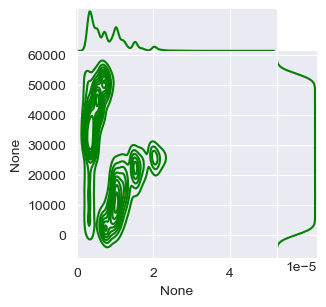

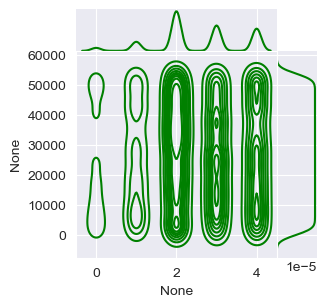

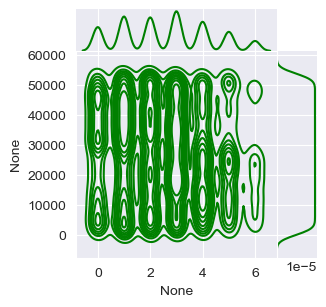

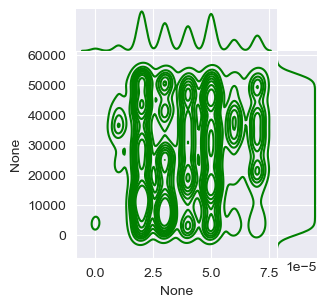

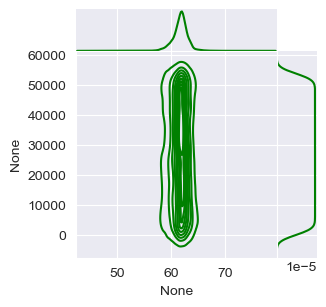

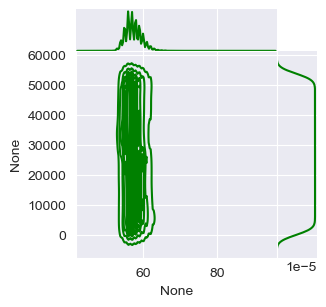

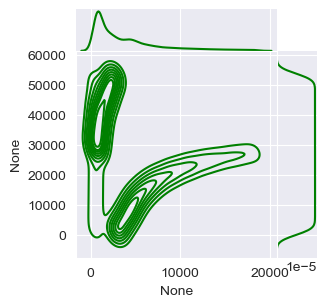

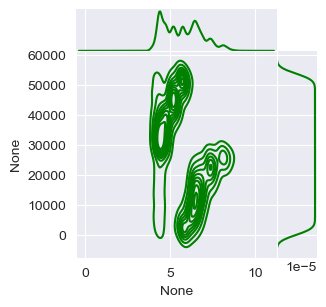

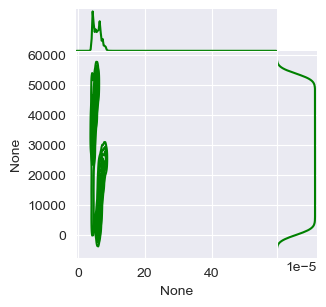

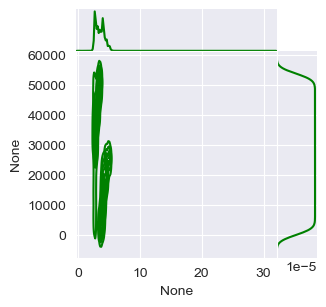

In [21]:
for feat_i in range(number_of_features):
    sns.jointplot(x=X[:,feat_i], y=y, kind="kde", space=0, color="g", height = 3)
plt.show()

In [25]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Коефициенти W:  [  26031.84247671   -1732.46050668    1560.53206927     214.39307747
  -28854.91815371  -10520.21453163   13901.87028608 -106427.35844724
  -22786.6211721     1653.5925045 ]
Пресек W0:  98161.57118368453
Средна квадратна грешка: 198115858.63526082
Средна апсолутна грешка: 11302.65401481101
Корен на средна квадратна грешка: 14075.36353474612
R-квадрат:  0.18460466572833456


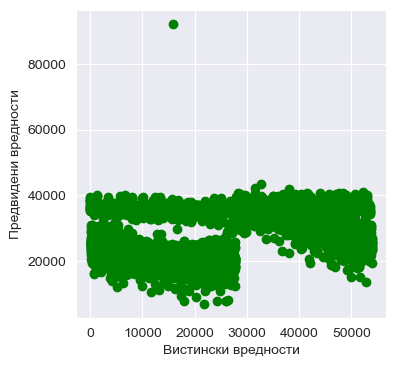

In [27]:
reg = LinearRegression().fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred = reg.predict(X_test)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred, color="green")
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

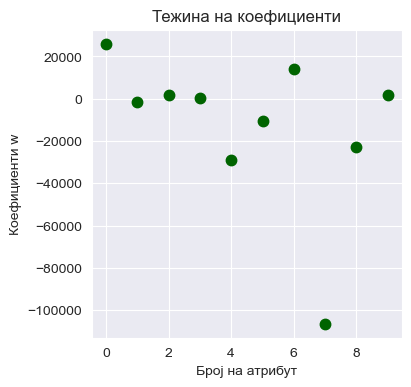

In [28]:
plt.figure(figsize=(4, 4))
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "darkgreen")
plt.xlabel("Број на атрибут")
plt.ylabel("Коефициенти w")
plt.title("Тежина на коефициенти")
plt.show()

In [48]:
lr = LinearRegression()
lr.fit(X,y)
lrsigma=np.sum((y-lr.predict(X))**2)/(N-2)

ridgelr = RidgeCV()
ridgelr.fit(X,y)
ridgesigma=np.sum((y-ridgelr.predict(X))**2)/(N-2)

lassolr = LassoCV()
lassolr.fit(X,y)
lasssigma=np.sum((y-lassolr.predict(X))**2)/(N-2)

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.4)
elasticnet.fit(X,y)
elasticsigma=np.sum((y-elasticnet.predict(X))**2)/(N-2)

bayesianridge = BayesianRidge
bayesianridge.fit(X,y)

print("Коефициенти на моделите")
print("Линеарна регресија: ",lr.coef_)
print("Риџ регресија: ", ridgelr.coef_)
print("Ласо регресија: ", lassolr.coef_)
print("Еластична мрежа:", elasticnet.coef_)
print("Баесова риџ регресија: ", bayesianridge.coef_)

Коефициенти на моделите
Линеарна регресија:  [ 2.59200470e+04 -1.62862402e+03  1.55422455e+03  9.74177128e+01
 -2.75018003e+04 -1.02562817e+04  1.45563110e+04 -1.04765664e+05
 -3.01414551e+04 -5.31116011e+03]
Риџ регресија:  [ 1.99312973e+04 -1.61996588e+03  1.61189098e+03  9.29732698e+01
 -2.57739178e+04 -9.93022097e+03  1.49624407e+04 -9.94545294e+04
 -2.31038903e+04 -1.35644974e+04]
Ласо регресија:  [-0. -0. -0.  0. -0. -0. -0. -0. -0. -0.]
Еластична мрежа: [-4892.43533428  -607.19538483 -1744.07020537  3199.22297964
  -343.86437233  -729.21369175 -7255.01117715 -6024.34023142
 -1091.01237885 -1269.4149649 ]
Баесова риџ регресија:  [ 2.49691306e+04 -1.62735040e+03  1.56366352e+03  9.62284711e+01
 -2.71701715e+04 -1.02041188e+04  1.46238481e+04 -1.03873653e+05
 -2.83365855e+04 -7.49377108e+03]


In [49]:
line_X = np.arange(20, X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ridge = ridgelr.predict(line_X)
line_y_lasso = lassolr.predict(line_X)
line_y_elastic = elasticnet.predict(line_X)
line_y_bayes, Bayessigma = bayesianridge.predict(line_X, return_std = True)

lw = 2
plt.figure()
plt.scatter(X, y, color='darkgreen', marker='.', s = 300)
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Линеарна регресија', alpha=0.5)
plt.errorbar(line_X, line_y,yerr=lrsigma)
plt.plot(line_X, line_y_ridge, color='cornflowerblue', linewidth=lw, label='Риџ регресија', alpha=0.5)
plt.plot(line_X, line_y_lasso, color='darkorange', linewidth=lw, label='Ласо регресија', alpha=0.5)
plt.plot(line_X, line_y_elastic, color="red", linewidth=lw, label='Еластична мрежа', alpha=0.5)
plt.plot(line_X, line_y_bayes, color="yellow", linewidth=lw, label='Баесова риџ регресија', alpha=0.5)
plt.errorbar(line_X, line_y_bayes, yerr=Bayessigma, alpha = 0.3)

plt.legend(loc='best')
plt.xlabel("Влез")
plt.ylabel("Излез")
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.